=== Financial Loss Simulation Result ===


,ブランド毀損率 (η),予想入学者数,定員充足率,年間財務損失額 (L),損失額(表記)
0,1%,1980,99.0%,24000000.0,0.24 億円
1,2%,1960,98.0%,48000000.0,0.48 億円
2,3%,1940,97.0%,72000000.0,0.72 億円
3,5%,1900,95.0%,120000000.0,1.20 億円
4,8%,1840,92.0%,192000000.0,1.92 億円
5,10%,1800,90.0%,240000000.0,2.40 億円


c:\Users\USER\miniconda3\envs\ir_project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20740 (\N{CJK UNIFIED IDEOGRAPH-5104}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


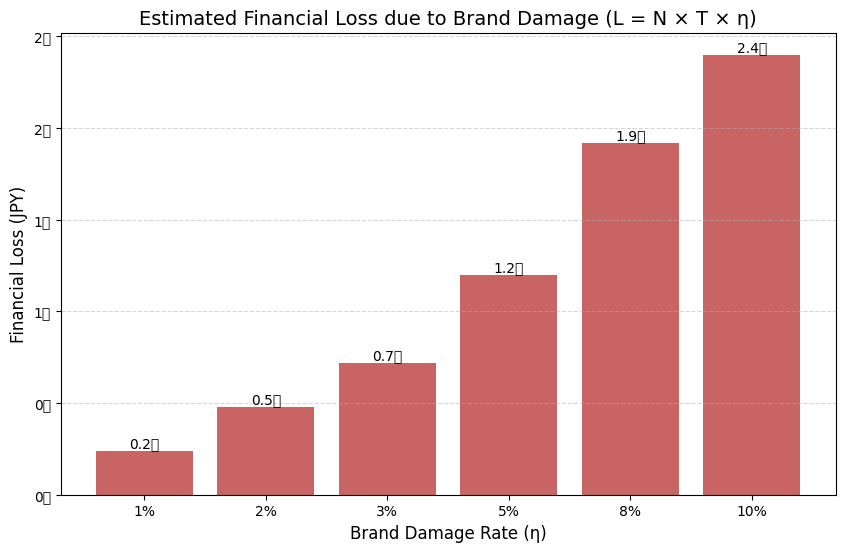

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ■ 大学経営における財務損失シミュレーションモデル
# 数式: L = N * T * η
# N: 学生数 (定員)
# T: 授業料 (単価)
# η: ブランド毀損率 (入学者減少率)

def loss_simulation():
    # 1. パラメータ設定 (Parameter Settings)
    # 例: 定員2,000人規模の学部、授業料120万円の場合
    N = 2000          # 定員 (Number of students)
    T = 1_200_000     # 授業料 (Tuition fee per year)
    
    # ブランド毀損率のシナリオ (0%から10%まで変動)
    eta_values = [0.01, 0.02, 0.03, 0.05, 0.08, 0.10] 
    
    results = []
    
    for eta in eta_values:
        # 損失額の計算 (L = N * T * eta)
        loss = N * T * eta
        
        # 定員充足率への影響 (定員割れシミュレーション)
        current_enrollment = N * (1 - eta)
        fill_rate = current_enrollment / N
        
        results.append({
            "ブランド毀損率 (η)": f"{eta:.0%}",
            "予想入学者数": int(current_enrollment),
            "定員充足率": f"{fill_rate:.1%}",
            "年間財務損失額 (L)": loss,  # グラフ用数値
            "損失額(表記)": f"{loss/100_000_000:.2f} 億円"
        })
        
    df = pd.DataFrame(results)
    
    # 2. 結果の表示 (Table)
    print("=== Financial Loss Simulation Result ===")
    display(df)
    
    # 3. 可視化 (Visualization)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df["ブランド毀損率 (η)"], df["年間財務損失額 (L)"], color='firebrick', alpha=0.7)
    
    # グラフの装飾
    plt.title('Estimated Financial Loss due to Brand Damage (L = N × T × η)', fontsize=14)
    plt.xlabel('Brand Damage Rate (η)', fontsize=12)
    plt.ylabel('Financial Loss (JPY)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Y軸を「億円」単位で見やすくする
    def format_func(value, tick_number):
        return f'{int(value/100_000_000)}億'
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    
    # バーの上に数値を表示
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height/100_000_000:.1f}億', ha='center', va='bottom')
    
    plt.show()

# 実行
loss_simulation()